In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Utils.greeks as gr
import Utils.option_pricing_utils as opu

#### Input Parameters

In [19]:
S = np.arange(1, 101, 1)
r = 0.05
sigma = 0.25
q = 0
T = 1
K = 30
type = 'c'

#### Delta

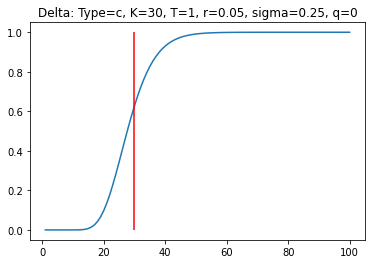

In [20]:
delta = gr.get_delta(S, K, T, sigma, r, q, type)
plt.plot(S, delta)
plt.vlines(x=K, color='r', ymin=min(delta), ymax=max(delta))
plt.title(f'Delta: Type={type}, K={K}, T={T}, r={r}, sigma={sigma}, q={q}')
plt.show()

#### Gamma

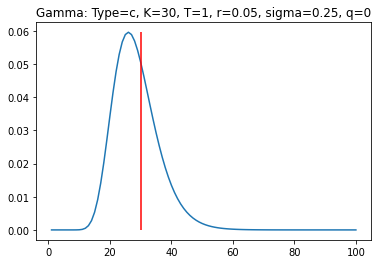

In [21]:
gamma = gr.get_gamma(S, K, T, sigma, r, q, type)
plt.plot(S, gamma)
plt.vlines(x=K, color='r', ymin=min(gamma), ymax=max(gamma))
plt.title(f'Gamma: Type={type}, K={K}, T={T}, r={r}, sigma={sigma}, q={q}')
plt.show()

#### Theta

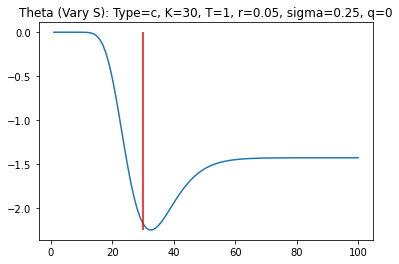

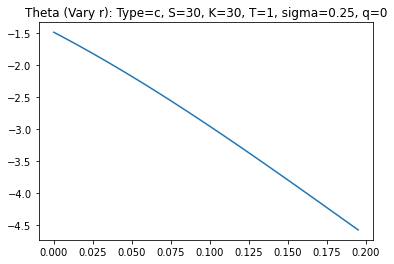

In [22]:
# Varying stock price
theta = gr.get_theta(S, K, T, sigma, r, q, type)
plt.plot(S, theta)
plt.vlines(x=K, color='r', ymin=min(theta), ymax=max(theta))
plt.title(f'Theta (Vary S): Type={type}, K={K}, T={T}, r={r}, sigma={sigma}, q={q}')
plt.show()

# Vary r
r_array = np.arange(0, 0.2, 0.005)
S0 = 30
theta = gr.get_theta(S0, K, T, sigma, r_array, q, type)
plt.plot(r_array, theta)
plt.title(f'Theta (Vary r): Type={type}, S={S0}, K={K}, T={T}, sigma={sigma}, q={q}')
plt.show()

#### Problem 19.26

In [42]:
S = 30
r = 0.05
sigma = 0.25
q = 0
T = 1
K = 30
dS = 0.1
S2 = S + dS

bs_price = opu.get_bs_price_analytical(S, K, T, sigma, r, q, type, display_result=False)
delta = gr.get_delta(S, K, T, sigma, r, q, type)
gamma = gr.get_gamma(S, K, T, sigma, r, q, type)
projected_price_delta_only = bs_price + delta*dS
projected_price_delta_gamma = bs_price + delta*dS + 1/2*gamma*dS**2
bs_price_new_actual = opu.get_bs_price_analytical(S2, K, T, sigma, r, q, type, display_result=False)

# Test Delta
print(f'Delta = {delta}, Gamma = {gamma}')
print(f'Current Price: {bs_price}, Projected Price (delta only): {projected_price_delta_only}, Type={type}, S={S0}, K={K}, T={T}, sigma={sigma}, q={q}')
print(f'Current Price: {bs_price}, Projected Price (delta + gamma): {projected_price_delta_gamma}, Type={type}, S={S0}, K={K}, T={T}, sigma={sigma}, q={q}')
print(f'Actual new price  - dS = {dS}: {bs_price_new_actual}\n')

# Test Gamma
projected_delta = delta + gamma*dS
delta_new_actual = gr.get_delta(S2, K, T, sigma, r, q, type)
print(f'Current Delta: {delta}, Projected Delta: {projected_delta}, Type={type}, S={S0}, K={K}, T={T}, sigma={sigma}, q={q}')
print(f'Actual New Delta  - dS = {dS}: {delta_new_actual}\n')

# Test Theta
dt = 0.01
T2 = T - dt
bs_price = opu.get_bs_price_analytical(S, K, T, sigma, r, q, type, display_result=False)
theta = gr.get_theta(S, K, T, sigma, r, q, type)
projected_price = bs_price + theta*dt
bs_price_new_actual = opu.get_bs_price_analytical(S, K, T2, sigma, r, q, type, display_result=False)

# Test Delta
print(f'Theta = {theta}')
print(f'Current Price: {bs_price}, Projected Price: {projected_price}, Type={type}, S={S0}, K={K}, T={T}, sigma={sigma}, q={q}')
print(f'Actual new price  - dt = {dt}: {bs_price_new_actual}\n')



Delta = 0.627409464153284, Gamma = 0.05045597759117593
Current Price: 3.700799679110613, Projected Price (delta only): 3.7635406255259416, Type=c, S=30, K=30, T=1, sigma=0.25, q=0
Current Price: 3.700799679110613, Projected Price (delta + gamma): 3.7637929054138977, Type=c, S=30, K=30, T=1, sigma=0.25, q=0
Actual new price  - dS = 0.1: 3.7637922587536714

Current Delta: 0.627409464153284, Projected Delta: 0.6324550619124016, Type=c, S=30, K=30, T=1, sigma=0.25, q=0
Actual New Delta  - dS = 0.1: 0.6324356428509343

Theta = -2.175148582026218
Current Price: 3.700799679110613, Projected Price: 3.6790481932903507, Type=c, S=30, K=30, T=1, sigma=0.25, q=0
Actual new price  - dt = 0.01: 3.6790079534145104

